In [1]:
import pandas as pd
import numpy as np

df_history = pd.read_parquet('/kaggle/input/copy-of-ml-1-shad-fall-2022/history_train.pq')
df_history


,category_id,microcategory_id,item_id,event_type,source_event_type,request_id,location_id,event_age_seconds
0,31,189,979366,0,0,136128,5215,2651288
1,31,6321,979366,2,8,136128,161,2651246
2,31,6321,979366,4,8,136128,5215,2651229
3,31,189,11420517,0,0,136128,5215,2651206
4,31,189,15674214,0,0,136128,5215,2651198
...,...,...,...,...,...,...,...,...
1470078,20,121,1946860,0,2,32097,5607,250743
1470079,20,135,9698131,0,3,32097,5607,250610
1470080,20,135,9698131,0,3,32097,5607,250569
1470081,20,135,1214040,0,4,32097,5616,250495


In [2]:
from scipy.sparse import csc_matrix

row = df_history['request_id'].values
col = df_history['item_id'].values
data = df_history['event_type'].values

sparse_history_matrix = csc_matrix((data, (row, col)), shape=(max(row) + 1, max(col) + 1), dtype=float)


In [3]:
from scipy.sparse.linalg import svds

u, s, vT = svds(sparse_history_matrix)


In [4]:
from sklearn.cluster import MiniBatchKMeans
u_c = MiniBatchKMeans(n_clusters=50).fit(u).labels_
v_c = MiniBatchKMeans(n_clusters=50).fit(vT.T).labels_


In [5]:
np.save( 'u_с.npy', u_c)
np.save('v_с.npy', v_c)

np.save('u.npy', u)
np.save('v.npy', vT.T)



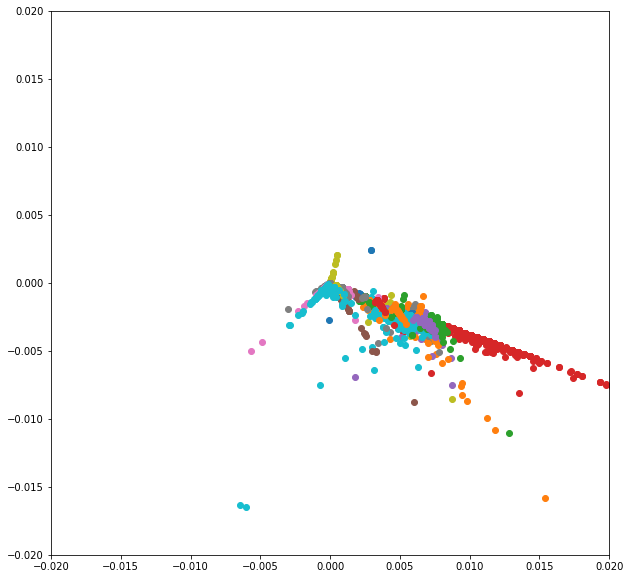

In [6]:
import matplotlib.pyplot as plt

random_projection_x = u @ np.random.normal(0, 1, u.shape[1]).reshape(-1, 1)
random_projection_y = u @ np.random.normal(0, 1, u.shape[1]).reshape(-1, 1)

plt.figure(figsize=(10, 10))
plt.xlim(-0.02, 0.02)
plt.ylim(-0.02, 0.02)
for i in range(1000):
    mask = (u_c == i)
    plt.scatter(random_projection_x[mask], random_projection_y[mask])
    
plt.show()